In [14]:
import sys
sys.path.append("../pre-processing")
sys.path.append("../pre-processing/methods")
sys.path.append("../learning_model")
from timeDomain import *
from freqDomain import *
from parse import parse
from prepare_data import prepare_data
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
from scipy import interpolate
from utils import precision_recall_f1

# Load Data

In [2]:
new_x = prepare_data("/Users/williamlevine/Downloads/OpenBCI-RAW-2017-07-02_18-43-29.txt", num_channels = 1, window = 225)[0]

../pre-processing/methods/freqDomain.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  ret[j][i] = fft(data[j][(i - window): i])
/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [3]:
labels = []
for _ in range(200):
    labels.append(0)
for _ in range(10):
    for _ in range(600):
        labels.append(1)
    for _ in range(600):
        labels.append(-1)
    for _ in range(800):
        labels.append(0)
new_x = new_x[0:len(labels)]
labels = labels[0:len(new_x)]

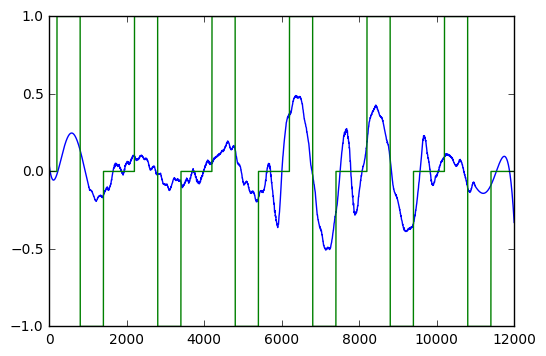

In [16]:
plt.plot(new_x[:, 1])
plt.plot(labels)
plt.show()

In [41]:
net = [new_x, labels]

In [8]:
predictions = []
for i in range(len(new_x)):
    if (new_x[i, 0] > np.percentile(new_x[:, 0], 25)):
        if new_x[i, 2] > 0:
            predictions.append(1)
        else:
            predictions.append(-1)
    else:
        predictions.append(0)
            

In [15]:
precision_recall_f1(predictions, labels)

Precision: 0.768443051202
Recall: 0.973266278454
F1: 0.858811164312


(0.7684430512016719, 0.9732662784542085, 0.858811164311573)

In [43]:
len(net[0])

24592

In [44]:
pickle.dump(net, open("/Users/williamlevine/Downloads/4-Seconds-Will-Trial-2.MultFeat", 'wb'))